<a href="https://colab.research.google.com/github/r-chaudhary/Artificial-Intelligent-Repo/blob/master/AI_BFS_DFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aritificial Intelligence Practical**

Graph is a data structure where BFS and DFS techinque will be applied. Here class Graph is a graph structure to be used in evaluating searching techniques. 

## Graph

In [14]:
class Graph:
    def __init__(self):
        self.graph = dict()

    def __len__(self):
        edge_count = 0
        for i in self.graph.items():
            edge_count += len(i) 
        return len(self.graph)

    def addVertex(self,vertex_name):
        self.graph[vertex_name] = list()

    def addEdge(self,from_vertex,to_vertex):
        try:
            #if to_vertex not in self.graph.keys():
            self.graph[from_vertex].append(to_vertex)
        except KeyError:
            print("Error : %s vertex not found."%(from_vertex))

    def removeVertex(self, vertex_name):
        try:
            self.graph.pop(vertex_name)
            for vertex, edge_list in self.graph.items():
                if vertex in edge_list:
                    self.graph[veretx].remove(vertex)                    
        except KeyError:
            print("Error : %s vertex not found."%(vertex_name))
    
    def removeEdge(self, from_vertex, to_vertex):
        if from_vertex not in self.graph.keys():
            print("Error : %s vertex not found."%(from_vertex))
        elif to_vertex not in self.graph.keys():
            print("Error : %s vertex not found."%(to_vertex))
        else:
            self.graph[from_vertex].remove(to_vertex)



## Breadth First Search

In [15]:
from prettytable import PrettyTable

def BreadthFirstSearch(G,start_vertex,search=None,verbose=False):
    print("-------- BREADTH FIRST SEARCH --------")
    graph = G.graph
    discovered_vertex = list(start_vertex)
    queue = list(start_vertex)  
    iteration = 0
    BFS_LIST = []
    search_found = False

    if verbose ==True:
        table = PrettyTable()
        table.field_names = ["Iteration No.","Vertex","Queue State","Discovered Vertex"]
        table.add_row([iteration,"",str(queue),str(discovered_vertex)])

    while len(queue) != 0:
        iteration += 1
        vertex = queue.pop(0)
        
        BFS_LIST.append(vertex)
        for v in graph[vertex]:
            if v not in discovered_vertex:
                queue.append(v)
                discovered_vertex.append(v)
            if (search in discovered_vertex) and (search_found is False):
                print("{} found in {} iteration".format(search,iteration))
                search_found = True
        if verbose == True : table.add_row([iteration,vertex,str(queue),str(discovered_vertex)]) 

        if search == vertex:
            print("{} reached in {} iteration".format(search,iteration))
            if verbose == True: print(table)
            return BFS_LIST
    
    if verbose == True: print(table)
    return BFS_LIST


## Depth First Search

In [16]:
from prettytable import PrettyTable

def DepthFirstSearch(G,start_vertex,search=None,verbose=False):
    print("-------- Depth FIRST SEARCH --------")
    graph = G.graph
    discovered_vertex = list(start_vertex)
    queue = list(start_vertex)  
    iteration = 0
    DFS_LIST = []
    search_found = False

    if verbose ==True:
        table = PrettyTable()
        table.field_names = ["Iteration No.","Vertex","Queue State","Discovered Vertex"]
        table.add_row([iteration,"",str(queue),str(discovered_vertex)])

    while len(queue) != 0:
        iteration += 1
        vertex = queue.pop()
        DFS_LIST.append(vertex)
        L = list()
        for v in graph[vertex]:
            if v not in discovered_vertex:
                L.append(v)
                discovered_vertex.append(v)
            if (search in discovered_vertex) and (search_found is False):
                print("{} found in {} iteration".format(search,iteration))
                search_found = True
        queue.extend(list(set(L)))

        if verbose == True : table.add_row([iteration,vertex,str(queue),str(discovered_vertex)]) 

        if search == vertex:
            print("{} reached in {} iteration".format(search,iteration))
            if verbose == True: print(table)
            return DFS_LIST
    
    if verbose == True: print(table)
    return DFS_LIST

## Main Program

### Graph Creation

In [17]:
if __name__ == "__main__": 
    G = Graph()
    G.addVertex('A')
    G.addVertex('B')
    G.addVertex('C')
    G.addVertex('D')
    G.addVertex('E')
    G.addVertex('F')
    G.addVertex('G')
    G.addVertex('H')
    G.addEdge('A','B')
    G.addEdge('A','C')
    G.addEdge('B','D')
    G.addEdge('B','E')
    G.addEdge('C','F')
    G.addEdge('C','G')
    G.addEdge('F','H')
    G.addEdge('G','H')



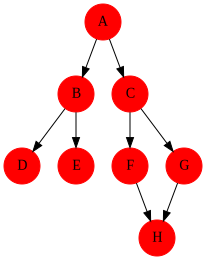

In [18]:
from graphviz import Digraph

styles = {
    'node': {'shape': 'circle', 'style': 'filled', 'color': 'red'},
}

T = Digraph()
for i in G.graph:
    T.node(i, i, styles['node'])
    for j in G.graph[i]:
        T.edge(i,j)
T

### Breadth First Search Demostration

In [19]:
bfs_result = BreadthFirstSearch(G,"A")
print("Result ",bfs_result)

-------- BREADTH FIRST SEARCH --------
Result  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']


In [20]:
bfs_result = BreadthFirstSearch(G,"A",verbose=True)
print("Result ",bfs_result)

-------- BREADTH FIRST SEARCH --------
+---------------+--------+----------------------+------------------------------------------+
| Iteration No. | Vertex |     Queue State      |            Discovered Vertex             |
+---------------+--------+----------------------+------------------------------------------+
|       0       |        |        ['A']         |                  ['A']                   |
|       1       |   A    |      ['B', 'C']      |             ['A', 'B', 'C']              |
|       2       |   B    |   ['C', 'D', 'E']    |        ['A', 'B', 'C', 'D', 'E']         |
|       3       |   C    | ['D', 'E', 'F', 'G'] |   ['A', 'B', 'C', 'D', 'E', 'F', 'G']    |
|       4       |   D    |   ['E', 'F', 'G']    |   ['A', 'B', 'C', 'D', 'E', 'F', 'G']    |
|       5       |   E    |      ['F', 'G']      |   ['A', 'B', 'C', 'D', 'E', 'F', 'G']    |
|       6       |   F    |      ['G', 'H']      | ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'] |
|       7       |   G    |     

In [21]:
bfs_result = BreadthFirstSearch(G,"A",search="E",verbose=True)
print("Result ",bfs_result)

-------- BREADTH FIRST SEARCH --------
E found in 2 iteration
E reached in 5 iteration
+---------------+--------+----------------------+-------------------------------------+
| Iteration No. | Vertex |     Queue State      |          Discovered Vertex          |
+---------------+--------+----------------------+-------------------------------------+
|       0       |        |        ['A']         |                ['A']                |
|       1       |   A    |      ['B', 'C']      |           ['A', 'B', 'C']           |
|       2       |   B    |   ['C', 'D', 'E']    |      ['A', 'B', 'C', 'D', 'E']      |
|       3       |   C    | ['D', 'E', 'F', 'G'] | ['A', 'B', 'C', 'D', 'E', 'F', 'G'] |
|       4       |   D    |   ['E', 'F', 'G']    | ['A', 'B', 'C', 'D', 'E', 'F', 'G'] |
|       5       |   E    |      ['F', 'G']      | ['A', 'B', 'C', 'D', 'E', 'F', 'G'] |
+---------------+--------+----------------------+-------------------------------------+
Result  ['A', 'B', 'C', 'D', 'E']

### Depth First Search Demostration

In [22]:
dfs_result = DepthFirstSearch(G,"A")
print("Result ",dfs_result)

-------- Depth FIRST SEARCH --------
Result  ['A', 'C', 'G', 'H', 'F', 'B', 'E', 'D']


In [23]:
dfs_result = DepthFirstSearch(G,"A",verbose=True)
print("Result ",dfs_result)

-------- Depth FIRST SEARCH --------
+---------------+--------+-----------------+------------------------------------------+
| Iteration No. | Vertex |   Queue State   |            Discovered Vertex             |
+---------------+--------+-----------------+------------------------------------------+
|       0       |        |      ['A']      |                  ['A']                   |
|       1       |   A    |    ['B', 'C']   |             ['A', 'B', 'C']              |
|       2       |   C    | ['B', 'F', 'G'] |        ['A', 'B', 'C', 'F', 'G']         |
|       3       |   G    | ['B', 'F', 'H'] |      ['A', 'B', 'C', 'F', 'G', 'H']      |
|       4       |   H    |    ['B', 'F']   |      ['A', 'B', 'C', 'F', 'G', 'H']      |
|       5       |   F    |      ['B']      |      ['A', 'B', 'C', 'F', 'G', 'H']      |
|       6       |   B    |    ['D', 'E']   | ['A', 'B', 'C', 'F', 'G', 'H', 'D', 'E'] |
|       7       |   E    |      ['D']      | ['A', 'B', 'C', 'F', 'G', 'H', 'D', 'E

In [24]:
dfs_result = DepthFirstSearch(G,"A",search="E",verbose=True)
print("Result ",dfs_result)

-------- Depth FIRST SEARCH --------
E found in 6 iteration
E reached in 7 iteration
+---------------+--------+-----------------+------------------------------------------+
| Iteration No. | Vertex |   Queue State   |            Discovered Vertex             |
+---------------+--------+-----------------+------------------------------------------+
|       0       |        |      ['A']      |                  ['A']                   |
|       1       |   A    |    ['B', 'C']   |             ['A', 'B', 'C']              |
|       2       |   C    | ['B', 'F', 'G'] |        ['A', 'B', 'C', 'F', 'G']         |
|       3       |   G    | ['B', 'F', 'H'] |      ['A', 'B', 'C', 'F', 'G', 'H']      |
|       4       |   H    |    ['B', 'F']   |      ['A', 'B', 'C', 'F', 'G', 'H']      |
|       5       |   F    |      ['B']      |      ['A', 'B', 'C', 'F', 'G', 'H']      |
|       6       |   B    |    ['D', 'E']   | ['A', 'B', 'C', 'F', 'G', 'H', 'D', 'E'] |
|       7       |   E    |      ['D